In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('home_price.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [55]:
df['price'].shape

(20,)

In [56]:
df['price'].values.reshape(df.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [57]:
from sklearn.preprocessing import MinMaxScaler

sx= MinMaxScaler()
sy= MinMaxScaler()

scaled_X = sx.fit_transform(df.drop(columns=['price']))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_X[:5], scaled_y[:5]

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074]]))

In [92]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [58]:
w = np.ones(shape=(2))
w

array([1., 1.])

In [59]:
scaled_X, scaled_X.shape

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 (20, 2))

In [60]:
scaled_X.T, scaled_X.T.shape

(array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
         0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
         0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
         0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
        [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
         0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
         0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
         0.25      , 0.5       , 0.5       , 0.5       , 0.        ]]),
 (2, 20))

In [61]:
np.dot(w, scaled_X.T) - np.dot(w, scaled_X.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [62]:
np.dot(scaled_X, w.T) - np.dot(w, scaled_X.T)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [63]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_predicted-y_true))
        
        if not i%10:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b,cost, cost_list, epoch_list

w, b,cost, cost_list, epoch_list= batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

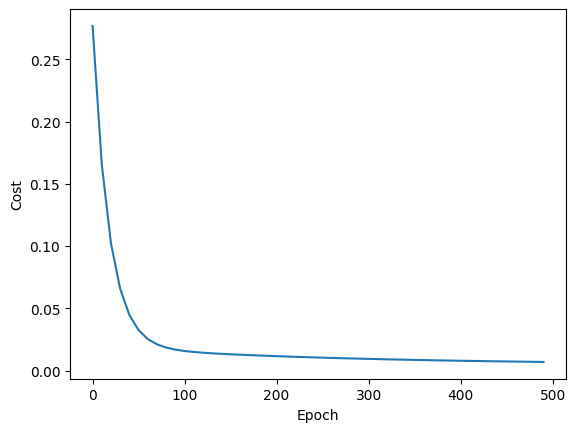

In [64]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

In [72]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0] # Return 2d array 
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1]  + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [73]:
predict(1000, 2, w, b)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [84]:
import random

random.randint(0,6)


0

In [129]:
def stochastic_gradient_descent(X, y_ture, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    total_samples = X.shape[0]
    w = np.ones(shape=(number_of_features))
    b = 0
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_ture[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - w_grad * learning_rate
        b = b - b_grad * learning_rate
        
        cost = np.square(y_predicted - sample_y)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70171743, 0.67385247]), -0.23209989279395005, 0.003570144212350303)

In [130]:
predict(2600, 4, w_sgd, b_sgd)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


127.69315829916668

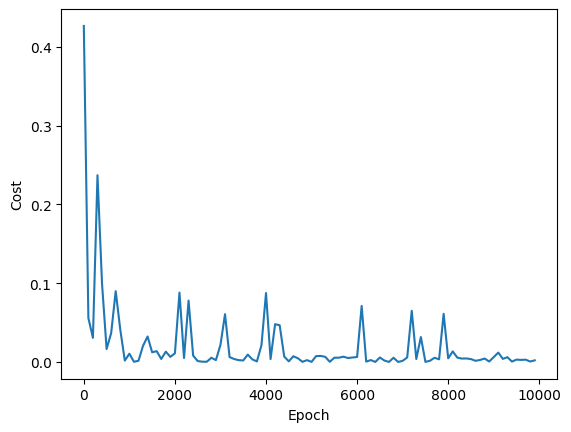

In [258]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [257]:
np.random.permutation(100)[:5]

array([39, 79, 67, 49, 61])

In [267]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    total_samples = X.shape[0]
    w = np.ones(shape=(number_of_features))
    b = 0
    
    cost_list = []
    epoch_list = []
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    for i in range(epochs):
        # Suffle data
        indices = np.random.permutation(total_samples)
        X_suffled = X[indices]
        y_suffled = y_true[indices]
        
        for j in range(0, total_samples, batch_size):
            X_batch = X_suffled[j:j+batch_size]
            y_batch = y_suffled[j:j+batch_size]
            
            y_predicted = np.dot(w, X_batch.T) + b
            
            w_grad = -(2/batch_size)*(X_batch.T.dot(y_batch - y_predicted))
            b_grad = -(2/batch_size)*np.sum(y_batch - y_predicted)
            
            w = w - w_grad * learning_rate
            b = b - b_grad * learning_rate
            
            cost = np.mean(np.square(y_batch - y_predicted))
            
        if i%10==0:
          cost_list.append(cost)
          epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 120, 5)

w_mbgd, b_mbgd, cost_mbgd

(array([0.71003559, 0.67817319]), -0.23324181624243562, 0.008150251931692316)

In [268]:
predict(2600,4, w_mbgd, b_mbgd)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.67347533708232

In [270]:
predict(1000, 2,w_mbgd,b_mbgd)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.011375980723436

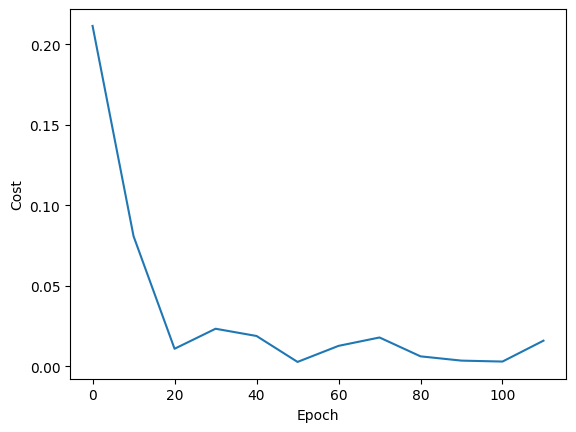

In [269]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_mbgd, cost_list_mbgd)